fiat_implot: widget for 1D and 2D numpy arrays
=============================================

Fiatlight provides `SimplePlotGui`, a viewer for numpy arrays that allows to plot 1D and 2D arrays with [ImPlot](https://github.com/epezent/implot)

> * ImPlot is a very capable and fast plotting library, not limited to simple 1D and 2D plots. It is available with Fiatlight and ImGui Bundle (on which Fiatlight is based). See [online demo](https://traineq.org/implot_demo/src/implot_demo.html) of ImPlot for more examples.
> * It is faster than Matplotlib within Fiatlight, and well adapted for real time plots (can refresh at 120FPS +)

Example
-------

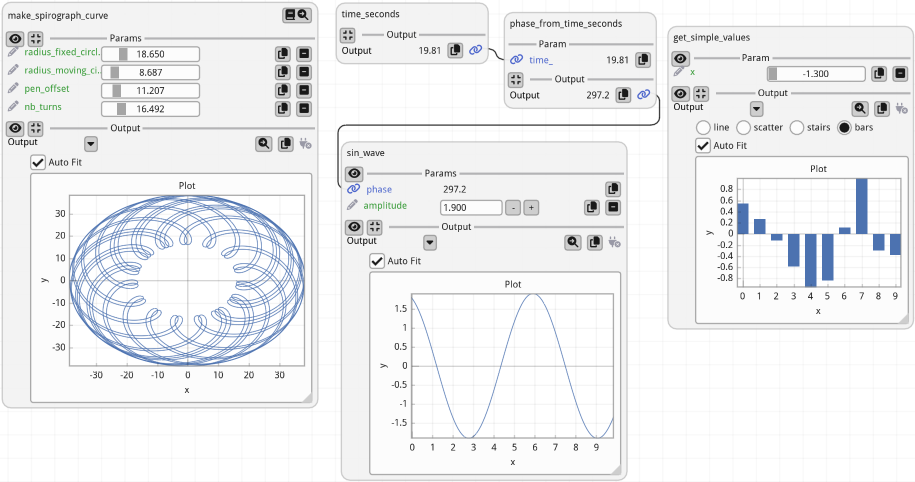

In [3]:
from fiatlight.fiat_kits.fiat_implot import demo_implot

demo_implot.main()

Fiat attributes available for SimplePlotGui
---------------------------------------------

**Here is a list of all the type handled by SimplePlotGui:**

In [3]:
%%bash
fiatlight types FloatMatrix_Dim

+----------------------------------------------------+---------------------------------------------------------------------+
| Data Type                                          | Gui Type                                                            |
+====================================================+=====================================================================+
| fiatlight.fiat_kits.fiat_implot.array_types.FloatM | fiatlight.fiat_kits.fiat_implot.simple_plot_gui.SimplePlotGui       |
| atrix_Dim1                                         |   A GUI for presenting 1D or 2D arrays with ImPlot. Can present the |
|   synonym for a 1D ndarray of floats (NewType)     | array as a line, scatter (+ stairs, or bars plot, if the array is   |
|                                                    | small enough)                                                       |
+----------------------------------------------------+---------------------------------------------------------------------+


**Here is a list of all the possible customizations options:**

In [4]:
%%bash
fiatlight gui SimplePlotGui

GUI type: SimplePlotGui
  A GUI for presenting 1D or 2D arrays with ImPlot. Can present the array as a line, scatter (+ stairs, or bars plot, if the array is small enough)

  Available custom attributes for SimplePlotGui:
  --------------------------------------------------------------------------------
  +-----------------------+---------------------+--------------+------------------------------------------------+
  | Name                  | Type                | Default      | Explanation                                    |
  +=======================+=====================+==============+================================================+
  | plot_type             | str                 | line         | The type of presentation to use. Choose from   |
  |                       |                     |              | line, scatter, stairs, or bars.                |
  +-----------------------+---------------------+--------------+------------------------------------------------+
  | plot_si

Source code for the example
---------------------------

In [4]:
import fiatlight
from fiatlight.fiat_notebook import look_at_code  # noqa
%look_at_python_file fiat_kits/fiat_implot/demo_implot.py

"""Demonstrates plots generated using ImPlot (https://github.com/epezent/implot). ImPlot is an immediate mode plotting library for Dear ImGui, whose rendering is often faster than MatPlotLib.

This example demonstrates
- how to create a live sine wave plot with adjustable frequency, phase, and amplitude using ImPlot.
  The frequency, phase, and amplitude can be adjusted interactively using knobs.
- how to create a spirograph-like curve using ImPlot.
"""

from fiatlight import fiat_implot
import fiatlight as fl
import numpy as np
import math
import time

_start_time = time.time()


def time_seconds() -> float:
    return time.time() - _start_time


def phase_from_time_seconds(time_: float) -> float:
    return time_ * 15.0


time_seconds.invoke_always_dirty = True  # type: ignore


def sin_wave(phase: float, amplitude: float = 1.0) -> fiat_implot.FloatMatrix_Dim2:
    x = np.arange(0, 10, 0.1)
    y = np.sin(x + phase) * amplitude
    r = np.stack((x, y))
    return r  # type: ignore


@fl.with_fiat_attributes(
    radius_fixed_circle__range=(0.0, 100.0),
    radius_moving_circle__range=(0.0, 100.0),
    pen_offset__range=(0.0, 100.0),
    nb_turns__range=(0.0, 100.0),
)
def make_spirograph_curve(
    radius_fixed_circle: float = 10.84,
    radius_moving_circle: float = 3.48,
    pen_offset: float = 6.0,
    nb_turns: float = 23.0,
) -> fiat_implot.FloatMatrix_Dim2:
    """a spirograph-like curve"""
    import numpy as np

    t = np.linspace(0, 2 * np.pi * nb_turns, int(500 * nb_turns))
    x = (radius_fixed_circle + radius_moving_circle) * np.cos(t) - pen_offset * np.cos(
        (radius_fixed_circle + radius_moving_circle) / radius_moving_circle * t
    )
    y = (radius_fixed_circle + radius_moving_circle) * np.sin(t) - pen_offset * np.sin(
        (radius_fixed_circle + radius_moving_circle) / radius_moving_circle * t
    )
    return np.array([x, y])  # type: ignore


@fl.with_fiat_attributes(
    x__range=(0.0, 10.0),
    return__plot_type="bars",
    return__auto_fit=False,
    return__plot_size_em=(20, 10),
)
def get_simple_values(x: float) -> fiat_implot.FloatMatrix_Dim1:
    r = []
    for i in range(10):
        r.append(math.cos(x**i))
    return np.array(r)  # type: ignore


def main() -> None:
    graph = fl.FunctionsGraph()
    graph.add_function(make_spirograph_curve)
    graph.add_function(get_simple_values)

    graph.add_function(time_seconds)
    graph.add_function(phase_from_time_seconds)
    graph.add_function(sin_wave)
    graph.add_link("time_seconds", "phase_from_time_seconds")
    graph.add_link("phase_from_time_seconds", "sin_wave")

    fl.run(graph, app_name="Demo ImPlot")


if __name__ == "__main__":
    main()